In [1]:
import os
from abcli import file
from openai_cli import NAME, VERSION
from openai_cli.completion.functions import complete_prompt
from openai_cli.completion.classes import ai_function
import matplotlib.pyplot as plt
import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"using {NAME}-{VERSION}.")

using openai_cli-2.86.1.


In [2]:
func = ai_function(
    inputs = ["an image as a numpy array"],
    returns = ["a darker version of the input image"],
    requirements = [
        "does not run a for loop on the pixels",
        "uses numpy vector functions",
        "imports all modules that are used in the code"
    ],
    output_class_name="ndarray",
    verbose=False,
)

ai_function.prompt=Write a python function named ai_function_65766904
that inputs an image as a numpy array
and does not run a for loop on the pixels and
uses numpy vector functions and
imports all modules that are used in the code
and returns a darker version of the input image


In [3]:
assert func.generate()

message='Request to OpenAI API' method=post path=https://api.openai.com/v1/completions
message='OpenAI API response' path=https://api.openai.com/v1/completions processing_ms=8086 request_id=a2b77970934a9e5007f11dab6f3e6c2b response_code=200
openai-cli.complete(): finish_reason: stop.
code: 

import numpy as np 
import cv2 

def ai_function_65766904(image): 
    """This function takes an image as numpy array and returns a darker version."""
    # convert image to HSV
    image_hsv= cv2.cvtColor(image,cv2.COLOR_BGR2HSV) 
      
    # adjust the value (V) channel of image  
    image_hsv[:,:,2] = image_hsv[:,:,2] * 0.5 
      
    # convert image back to BGR 
    image_darker = cv2.cvtColor(image_hsv,cv2.COLOR_HSV2BGR)  
      
    return image_darker


In [4]:
input_image = file.load_image(
    os.path.join(
        os.getenv("HOME",""),
        "git/blue-bracket/images/portal-34.jpg")
        )[1]
image_output = func.compute(input_image)
assert image_output is not None

func_ai.compute(ndarray)


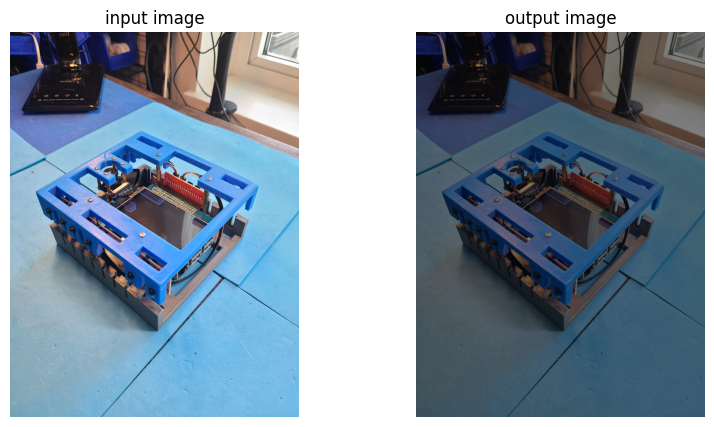

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(input_image)
axes[0].axis('off') 
axes[0].set_title("input image")

axes[1].imshow(image_output)
axes[1].axis('off')
axes[1].set_title("output image")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1)
plt.show()

In [6]:
# END